<a href="https://colab.research.google.com/github/Dimple-Bansal-003/Deep-Learning/blob/Convolution-Neural-Network/Applying%20CNN%20to%20an%20Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Applying CNN to an Image
#applying convolution layer -> activation -> pooling

In [4]:
#Import necessary libraries
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from itertools import product

In [5]:
plt.rc('figure',autolayout = True)
plt.rc('image',cmap='magma')

In [6]:
#define the kernel
kernel = tf.constant([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])


In [16]:
from google.colab import files
uploaded = files.upload()

Saving Ganesh.jpg to Ganesh.jpg


In [17]:
#load the image
image = tf.io.read_file('Ganesh.jpg')
image = tf.io.decode_jpeg(image,channels=1)
image = tf.image.resize(image,size=[300,300])

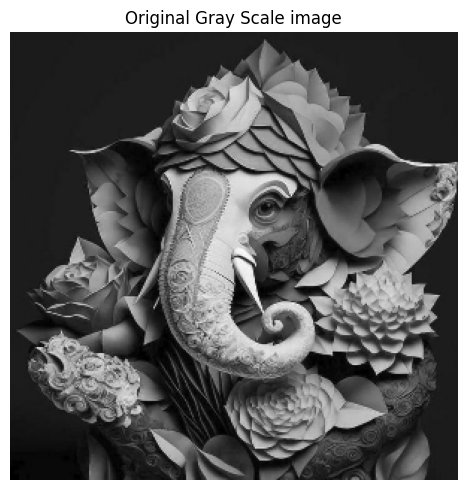

In [20]:
#plot the image
img = tf.squeeze(image).numpy()
plt.figure(figsize=(5,5))
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('Original Gray Scale image')
plt.show()

In [21]:
#reformat
image = tf.image.convert_image_dtype(image,dtype=tf.float32)
image = tf.expand_dims(image,axis=0)
kernel = tf.reshape(kernel,[*kernel.shape,1,1])
kernel = tf.cast(kernel,dtype=tf.float32)

In [22]:
#convolution layer
conv_fn = tf.nn.conv2d
image_filter = conv_fn(input=image,filters=kernel,strides=1,padding='SAME')
plt.figure(figsize=(15,5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0.5, 1.0, 'Convolution')

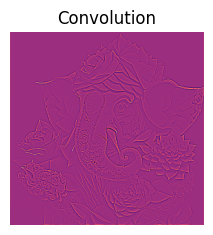

In [23]:
#plot the convoluted image
plt.subplot(1,3,1)
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.title('Convolution')

Text(0.5, 1.0, 'Activation')

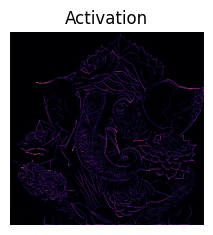

In [24]:
#activation layer
relu_fn = tf.nn.relu
#image detection
image_detect = relu_fn(image_filter)
plt.subplot(1,3,2)
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.title('Activation')

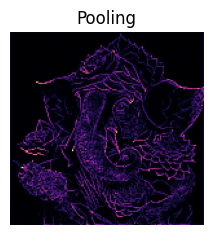

In [25]:
#pooling layer
pool = tf.nn.pool
image_condense = pool(input = image_detect,window_shape=(2,2),pooling_type='MAX',strides =(2,2),padding='SAME')
plt.subplot(1,3,3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()